# 3.2 在MATLAB中计算及观察二维DFT

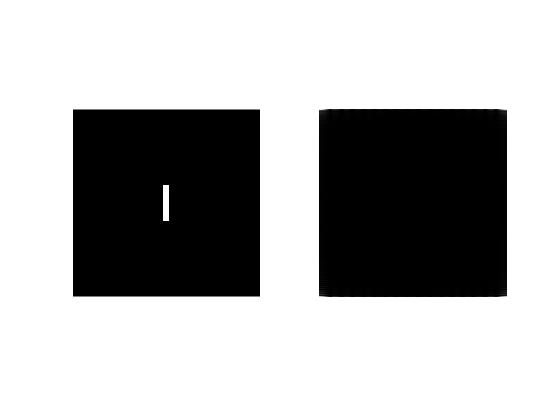

In [8]:
f = imread('Fig0303(a).tif');
F = fft2(f);
S = abs(F);
subplot(121), imshow(f);
subplot(122), imshow(S, []);

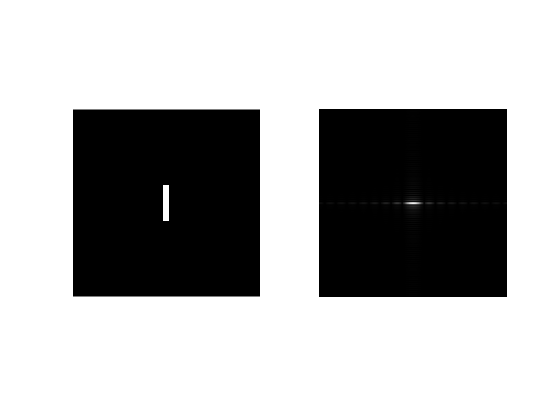

In [9]:
Fc = fftshift(F);
subplot(121), imshow(f);
subplot(122), imshow(abs(Fc), []);

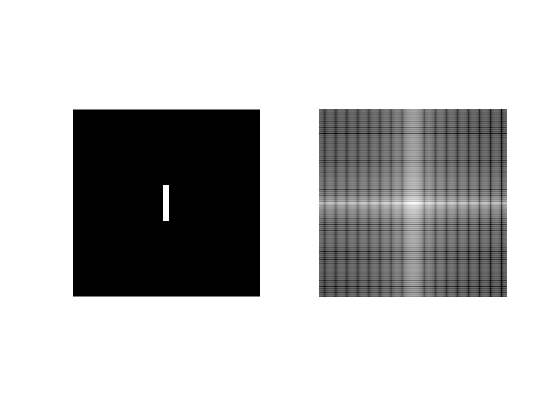

In [10]:
S2 = log(1 + abs(Fc));
subplot(121), imshow(f);
subplot(122), imshow(S2, []);

警告: 显示复数输入项的实部。
> In images.internal.imageDisplayValidateParams>validateCData (line 143)
  In images.internal.imageDisplayValidateParams (line 27)
  In images.internal.imageDisplayParseInputs (line 78)
  In imshow (line 245)



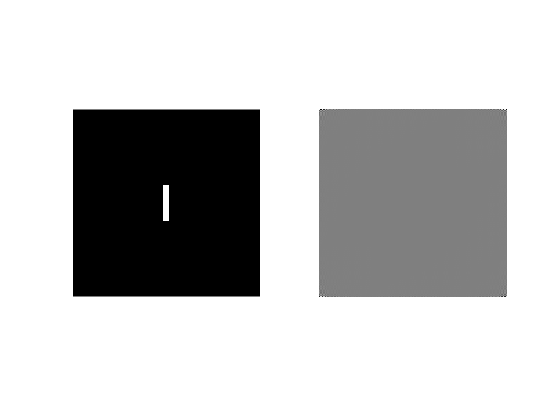

In [13]:
phi = angle(F);
F = S .* exp(i * phi);
subplot(121), imshow(f);
subplot(122), imshow(F, []);